In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
train = pd.read_csv(r'hr_temp_20170201-20200131_subset.csv', parse_dates = ['DATE'])
temp_eval = pd.read_csv(r'hr_temp_20200201-20200229_subset.csv', parse_dates = ['DATE'])
hrl = pd.read_csv(r'hrl_load_metered - 20170201-20200131.csv', parse_dates = ['datetime_beginning_utc','datetime_beginning_ept'])

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   STATION                   26280 non-null  int64         
 1   DATE                      26280 non-null  datetime64[ns]
 2   REPORT_TYPE               26280 non-null  object        
 3   SOURCE                    26280 non-null  int64         
 4   HourlyDryBulbTemperature  26243 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.0+ MB


In [4]:
hrl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   datetime_beginning_utc  26280 non-null  datetime64[ns]
 1   datetime_beginning_ept  26280 non-null  datetime64[ns]
 2   nerc_region             26280 non-null  object        
 3   mkt_region              26280 non-null  object        
 4   zone                    26280 non-null  object        
 5   load_area               26280 non-null  object        
 6   mw                      26280 non-null  float64       
 7   is_verified             26280 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(1), object(4)
memory usage: 1.4+ MB


In [5]:
train['DATE'] = train['DATE'].dt.floor('h')

In [6]:
hrl['DATE'] = hrl['datetime_beginning_utc'] + timedelta(hours = -5)

In [7]:
hrl.head()

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified,DATE
0,2017-02-01 05:00:00,2017-02-01 00:00:00,RFC,WEST,DUQ,DUQ,1419.881,True,2017-02-01 00:00:00
1,2017-02-01 06:00:00,2017-02-01 01:00:00,RFC,WEST,DUQ,DUQ,1379.505,True,2017-02-01 01:00:00
2,2017-02-01 07:00:00,2017-02-01 02:00:00,RFC,WEST,DUQ,DUQ,1366.106,True,2017-02-01 02:00:00
3,2017-02-01 08:00:00,2017-02-01 03:00:00,RFC,WEST,DUQ,DUQ,1364.453,True,2017-02-01 03:00:00
4,2017-02-01 09:00:00,2017-02-01 04:00:00,RFC,WEST,DUQ,DUQ,1391.265,True,2017-02-01 04:00:00


In [8]:
train.head()

,STATION,DATE,REPORT_TYPE,SOURCE,HourlyDryBulbTemperature
0,72520514762,2017-02-01 00:00:00,FM-15,7,37.0
1,72520514762,2017-02-01 01:00:00,FM-15,7,37.0
2,72520514762,2017-02-01 02:00:00,FM-15,7,36.0
3,72520514762,2017-02-01 03:00:00,FM-15,7,36.0
4,72520514762,2017-02-01 04:00:00,FM-15,7,36.0


In [9]:
train = pd.merge(train, hrl, how = 'left')

In [10]:
drop_cols = train.columns.tolist()
drop_cols.remove('mw')
drop_cols.remove('HourlyDryBulbTemperature')
drop_cols.remove('DATE')
train = train.drop(columns = drop_cols)
train.head()

,DATE,HourlyDryBulbTemperature,mw
0,2017-02-01 00:00:00,37.0,1419.881
1,2017-02-01 01:00:00,37.0,1379.505
2,2017-02-01 02:00:00,36.0,1366.106
3,2017-02-01 03:00:00,36.0,1364.453
4,2017-02-01 04:00:00,36.0,1391.265


In [11]:
train['hour'] = train['DATE'].dt.hour
train['weekday'] = train['DATE'].dt.dayofweek
train['month'] = train['DATE'].dt.month
train['year'] = train['DATE'].dt.year
train.columns = train.columns.str.lower()
train = train.set_index('date')

In [12]:
train = train.rename(columns = {'hourlydrybulbtemperature':'temp'})
train = train.reindex(columns = ['mw','temp','hour','weekday','month','year'])

In [13]:
train.head(30)

,mw,temp,hour,weekday,month,year
date,,,,,,
2017-02-01 00:00:00,1419.881,37.0,0,2,2,2017
2017-02-01 01:00:00,1379.505,37.0,1,2,2,2017
2017-02-01 02:00:00,1366.106,36.0,2,2,2,2017
2017-02-01 03:00:00,1364.453,36.0,3,2,2,2017
2017-02-01 04:00:00,1391.265,36.0,4,2,2,2017
2017-02-01 05:00:00,1477.343,36.0,5,2,2,2017
2017-02-01 06:00:00,1585.252,34.0,6,2,2,2017
2017-02-01 07:00:00,1671.412,33.0,7,2,2,2017
2017-02-01 08:00:00,1708.597,34.0,8,2,2,2017


In [14]:
train = train.interpolate()

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26280 entries, 2017-02-01 00:00:00 to 2020-01-31 23:00:00
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mw       26280 non-null  float64
 1   temp     26280 non-null  float64
 2   hour     26280 non-null  int64  
 3   weekday  26280 non-null  int64  
 4   month    26280 non-null  int64  
 5   year     26280 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.4 MB


In [16]:
test = train[train['year'] == 2020]
train = train[train['year'] < 2020]

Text(0.5, 1.0, 'Temperature Over Time')

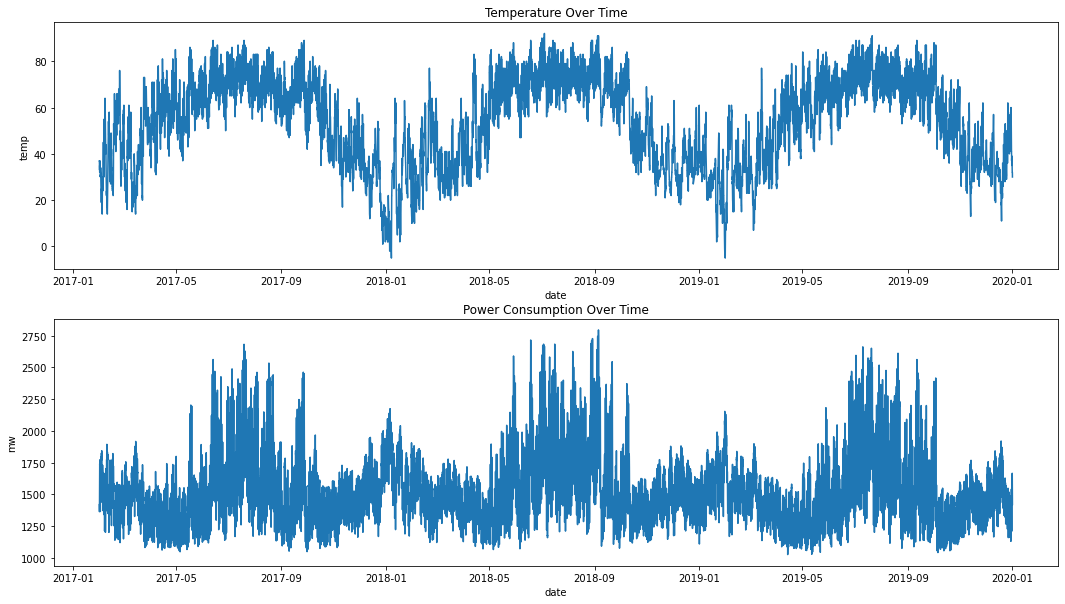

In [17]:
fig, axes = plt.subplots(2, 1, figsize = (18,10))
g1 = sns.lineplot(ax = axes[1], data = train.mw)
g2 = sns.lineplot(ax = axes[0], data = train.temp)
g1.set_title('Power Consumption Over Time')
g2.set_title('Temperature Over Time')

Text(0.5, 1.0, 'Power Consumption Over One Week (2/13/17 to 2/20/17)')

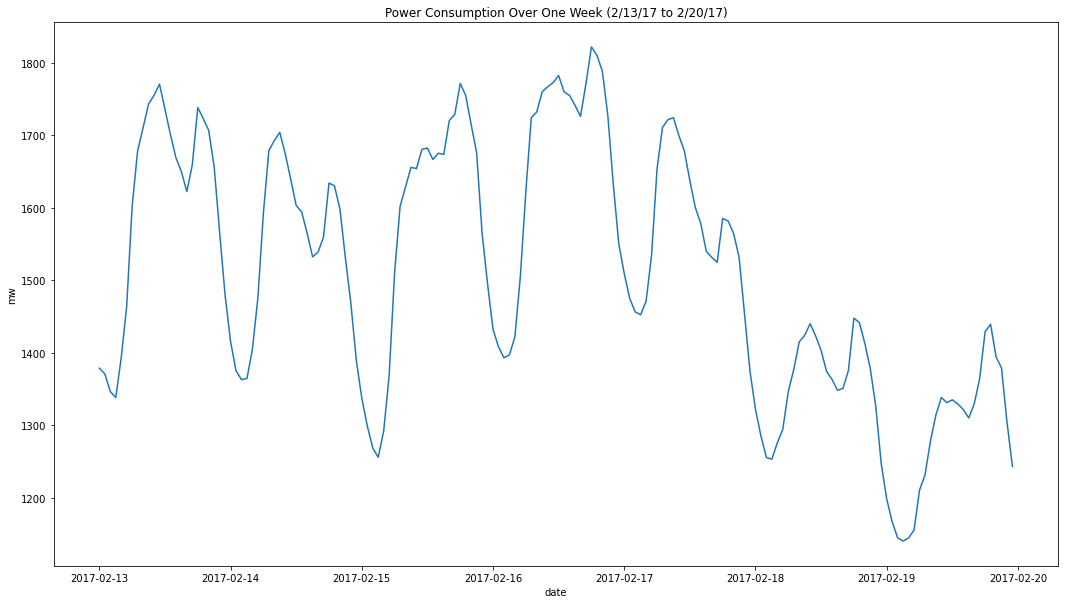

In [18]:
fig, axes = plt.subplots(figsize = (18,10))
g1 = sns.lineplot(data = train.mw[(train.index >= '2017-02-13') & (train.index < '2017-02-20')])
g1.set_title('Power Consumption Over One Week (2/13/17 to 2/20/17)')

In [19]:
correlation = train.corr()
correlation['mw']['temp']

0.3275395569074099

Text(0, 0.5, 'Megawatt Hours')

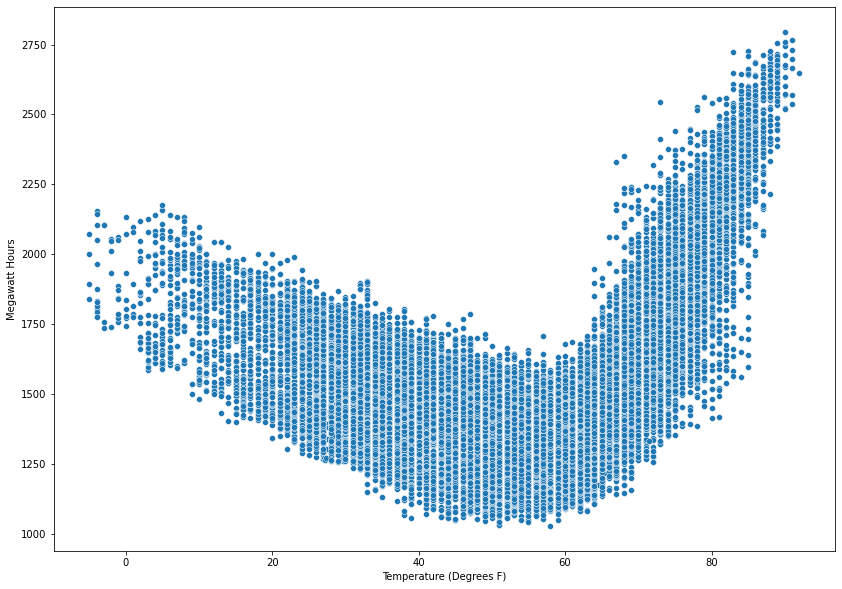

In [20]:
fig, ax = plt.subplots(figsize = (14, 10))
p = sns.scatterplot(x = train.temp, y = train.mw)
p.set_xlabel('Temperature (Degrees F)')
p.set_ylabel('Megawatt Hours')